In [1]:
# for columns in train.columns:
#     if train[columns].dtype not in ['int32', 'int64', 'float32', 'float64']:
#         train = train.drop(columns, 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
%matplotlib inline
style.use("ggplot")

accuracy = metrics.f1_score
# accuracy = metrics.accuracy_score

/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv("titanic_training.csv", header = 0) 
train = pd.DataFrame.copy(data)

### Sex

In [4]:
train['Sex'] = train.Sex.map({'male':1, 'female':0})

### Cabin

In [5]:
for x in train:
    train["Cabin"] = train["Cabin"].str[0]

In [6]:
def transform(char): 
    if char == "0":
        return np.nan
    if char == "A":
        return 1 
    if char == "B":
        return 2 
    if char == "C":
        return 3 
    if char == "D":
        return 4 
    if char == "E":
        return 5 
    if char == "F":
        return 6 
    if char == "G":
        return 7 
    if char == "T":
        return np.nan

train['Cabin'] = train['Cabin'].apply(transform)
train["Cabin"].fillna(train.groupby("Fare")["Cabin"].transform("mean"), inplace=True)

In [7]:
train.Cabin.value_counts()

5.000000    78
3.000000    71
4.750000    65
2.000000    53
6.000000    50
4.000000    33
5.500000    20
1.000000    19
1.666667    13
3.625000     7
7.000000     4
2.400000     2
2.800000     1
2.750000     1
Name: Cabin, dtype: int64

In [8]:
def transform(room): 
    if room <= 4: return "Upper Class"
#     if room > 3 and room <= 6: return "Middle Class"
    if room > 4: return "Lower Class"

train['Cabin'] = train['Cabin'].apply(transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,Upper Class,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,Upper Class,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Lower Class,S


In [9]:
train = pd.get_dummies(train, columns = ['Cabin'], drop_first = True)

### Title

In [10]:
train['Title'] = 'Other'
train.loc[['Master.' in title for title in train.Name], 'Title'] = 'Master'
train.loc[['Miss.' in title for title in train.Name], 'Title'] = 'Miss'
train.loc[['Mr.' in title for title in train.Name], 'Title'] = 'Mr'
train.loc[['Mrs.' in title for title in train.Name], 'Title'] = 'Mrs'
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Upper Class,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,Mr


In [11]:
train.groupby('Title')['Age'].mean()

Title
Master     4.116750
Miss      17.467033
Mr        24.917795
Mrs       31.016000
Other     40.814815
Name: Age, dtype: float64

# Age

In [12]:
# Fill Missing Age With Age Based On The Mean Of A Person's Title
train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)

In [13]:
def transform(num): 
    if num <= 10: return "Young"
    if num > 10 and num <= 30: "Mid"
    if num > 30: return "Old"

train['Age'] = train['Age'].apply(transform)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Upper Class,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,None,1,0,A/5 21171,7.2500,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,Old,1,0,PC 17599,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,None,0,0,STON/O2. 3101282,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,Old,1,0,113803,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,Old,0,0,373450,8.0500,S,0,Mr


In [14]:
train = pd.get_dummies(train, columns = ['Age'], drop_first = True)

# Family 

In [15]:
train["Family"] = train["Parch"] + train["SibSp"] + 1
# Join Siblings/Spouse/Parents/Yourself Into One Whole Family

In [16]:
# def transform(family): 
#     if family < 1: return "Alone"
# #     if parch > 0 and parch <= 2: return "2Parch"
#     if family >= 1: return "HasFamily"

# train['Family'] = train['Family'].apply(transform)

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(np.array(train.Family))
train["Family"] = le.transform(train.Family)

In [18]:
train["Family"].fillna(train["Family"].mean(), inplace=True)

In [19]:
train = pd.get_dummies(train, columns = ['Family'], drop_first = True)

# Others

In [20]:
train = pd.get_dummies(train, columns = ['Sex', 'Embarked', 'Pclass', 'Title'], drop_first = True)
train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Cabin_Upper Class,Age_Young,Family_1,...,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,0,1,...,1,0,0,1,0,1,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [21]:
del train["Embarked_C"]
train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Cabin_Upper Class,Age_Young,Family_1,...,Family_8,Sex_1,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,0,0,1,...,0,1,0,1,0,1,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,0,0,0,...,0,1,0,1,0,1,0,1,0,0


### Fare

In [22]:
# Fill Missing Fare With mean Fare Of Each Pclass
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("mean"), inplace=True)

In [23]:
data.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [24]:
# def transform(num): 
#     if num <= 30: return 0
#     else: return 1

# train['Fare'] = train['Fare'].apply(transform)
# train.head()

In [25]:
# train = pd.get_dummies(train, columns = ['Fare'], drop_first = True)

In [26]:
del train['Name'], train['Ticket'], train['PassengerId'], train['SibSp'], train['Parch']

In [27]:
train = train.fillna(train.mean(), inplace = True)  # Impute Missing Data
train = train.astype(float) # Convert DF Type to Float

"""Split Data"""
train = train[0:len(train)]
test = train[len(train):]

"""Normalize Data for Faster Computation"""
train = train/train.max().astype(np.float64)
test = test/test.max().astype(np.float64)

In [28]:
"""Moving Survived Column Into The Front Will Make It Easier to Extract Later"""
cols = train.columns.tolist()
cols.insert(0, cols.pop(cols.index('Survived')))
train = train.reindex(columns= cols)
train.head()

,Survived,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,...,Family_8,Sex_1,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
print("Index Location of Target:", train.columns.get_loc("Survived"))

Index Location of Target: 0


In [30]:
"""Split The Survived Column From Features"""
X = pd.DataFrame(train.ix[:,1:])
target = train["Survived"]
X.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_8,Sex_1,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
"""Create Our Own Training And Testing Set To Test Our Model's Accuracy"""
train_, test_, targ_train, targ_test = train_test_split(X, target, test_size = 0.40, random_state = None)

In [32]:
print ("Train:       ", train_.shape)
print ("Train Class: ", targ_train.shape)
print ("Test:        ", test_.shape)
print ("Test Class:  ", targ_test.shape)

Train:        (534, 20)
Train Class:  (534,)
Test:         (357, 20)
Test Class:   (357,)


In [33]:
"""Reset Index: This Will Make Storing The Data Easier Later"""
train_ = train.reset_index()
test_ = test_.reset_index()
targ_test = targ_test.reset_index()

In [34]:
"""Delete The Old Indexes"""
del train_["index"], test_["index"], targ_test["index"]

### Part 1: 

Partition Training Data into 5 Folds:

- Create train_meta with same rows and IDs as training data
- Create Empty Columns: M1 and M2 (NaNs)

- Create test_meta variable with same rows and IDs as test dataset 
- Create Empty Columns: M1 and M2 (NaNs)

In [35]:
"""Create Our Train and Test Meta Sets"""
train_meta = pd.DataFrame.copy(train_)
train_meta["M1"] = np.nan
train_meta["M2"] = np.nan
train_meta["M3"] = np.nan
train_meta["M4"] = np.nan
train_meta["M5"] = np.nan
train_meta["M6"] = np.nan
print(train.shape)
train_meta.head()

(891, 21)


,Survived,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
test_meta = pd.DataFrame.copy(test_)
print(test_.shape)
test_meta.head()

(357, 20)


,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_8,Sex_1,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.012175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.175668,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.264739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


### Part 2

For each train fold: combine the other 4 into a training set and predict on each fold i 
- train fold 1 = 2,3,4,5 (Predict on fold 1)
- train fold 2 = 1,3,4,5 (Predict on Fold 2)
- train fold 3 = 1,2,4,5 (Predict on Fold 3)
- train fold 4 = 1,2,3,5 (Predict on Fold 4)
- train fold 5 = 1,2,3,4 (Predict on Fold 5)

In [37]:
"""This Data Will Be Stored In The Code At The Bottom"""
from sklearn.model_selection import KFold
kf = KFold(n_splits = 20, shuffle = False)
for train_index, test_index in kf.split(train_):
    print("Train:", train_index, "Test:", test_index, "\n")

Train: [ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289

In [38]:
print("Index Location of Target:", train.columns.get_loc("Survived"))

Index Location of Target: 0


### We Will Need To Copy and Paste Output: Change Target Index In Folds If Necessary
    - Usually Will Be The 0th Index If We Preset The Index Above

In [39]:
j = 1
# The Variable "j" Sets It So That Our First Training Set Will Be Called: train_fold1, test_fold1, target_fold1, etc..

for train_index, test_index in kf.split(train):
# Set Up To {1-10} Train Folds With All The Data
    print ('train_fold{} = train'.format(j))  
    
# Seperate Up To {1-10} Test Folds Without The Class
    print ('test_fold{} = train.ix[{}:{}, 1:]'.format(j, min(test_index), max(test_index) + 1))
    
# Seperate Up To {1-10} Target Folds Using Only The Class
    print ('target_fold{} = train_fold{}.ix[:,0]'.format(j,j))
    
# Seperate All Features Out Of The Training Set {1-10} 
    print ('train_fold{} = train_fold{}.ix[{}:,1:]'.format(j,j, 0))
    
# Drop 1/10th Of The Excluded Training Set Which Is Used As The Test Data For Cross Validation 
    print ('train_fold{} = train_fold{}.drop(train_fold{}.index[{}:{}])'.format(j, j, j, min(test_index), max(test_index) + 1))
    
# Now Drop 1/10th Of The Excluded Target Set To Match The Shape Of The Training Set
    print ('target_fold{} = target_fold{}.drop(target_fold{}.index[{}:{}])'.format(j, j, j, min(test_index), max(test_index) + 1), "\n")

# Iterate By 1. This Will Stop At The Number Of Training KFolds We Have (e.g. 10 Folds)
    j += 1

train_fold1 = train
test_fold1 = train.ix[0:45, 1:]
target_fold1 = train_fold1.ix[:,0]
train_fold1 = train_fold1.ix[0:,1:]
train_fold1 = train_fold1.drop(train_fold1.index[0:45])
target_fold1 = target_fold1.drop(target_fold1.index[0:45]) 

train_fold2 = train
test_fold2 = train.ix[45:90, 1:]
target_fold2 = train_fold2.ix[:,0]
train_fold2 = train_fold2.ix[0:,1:]
train_fold2 = train_fold2.drop(train_fold2.index[45:90])
target_fold2 = target_fold2.drop(target_fold2.index[45:90]) 

train_fold3 = train
test_fold3 = train.ix[90:135, 1:]
target_fold3 = train_fold3.ix[:,0]
train_fold3 = train_fold3.ix[0:,1:]
train_fold3 = train_fold3.drop(train_fold3.index[90:135])
target_fold3 = target_fold3.drop(target_fold3.index[90:135]) 

train_fold4 = train
test_fold4 = train.ix[135:180, 1:]
target_fold4 = train_fold4.ix[:,0]
train_fold4 = train_fold4.ix[0:,1:]
train_fold4 = train_fold4.drop(train_fold4.index[135:180])
target_fold4 = target_fold4.drop(target_fold4.index[135:180]) 

train_fold5 = train
te

##### Copy Output Below

In [40]:
train_fold1 = train
test_fold1 = train.ix[0:45, 1:]
target_fold1 = train_fold1.ix[:,0]
train_fold1 = train_fold1.ix[0:,1:]
train_fold1 = train_fold1.drop(train_fold1.index[0:45])
target_fold1 = target_fold1.drop(target_fold1.index[0:45]) 

train_fold2 = train
test_fold2 = train.ix[45:90, 1:]
target_fold2 = train_fold2.ix[:,0]
train_fold2 = train_fold2.ix[0:,1:]
train_fold2 = train_fold2.drop(train_fold2.index[45:90])
target_fold2 = target_fold2.drop(target_fold2.index[45:90]) 

train_fold3 = train
test_fold3 = train.ix[90:135, 1:]
target_fold3 = train_fold3.ix[:,0]
train_fold3 = train_fold3.ix[0:,1:]
train_fold3 = train_fold3.drop(train_fold3.index[90:135])
target_fold3 = target_fold3.drop(target_fold3.index[90:135]) 

train_fold4 = train
test_fold4 = train.ix[135:180, 1:]
target_fold4 = train_fold4.ix[:,0]
train_fold4 = train_fold4.ix[0:,1:]
train_fold4 = train_fold4.drop(train_fold4.index[135:180])
target_fold4 = target_fold4.drop(target_fold4.index[135:180]) 

train_fold5 = train
test_fold5 = train.ix[180:225, 1:]
target_fold5 = train_fold5.ix[:,0]
train_fold5 = train_fold5.ix[0:,1:]
train_fold5 = train_fold5.drop(train_fold5.index[180:225])
target_fold5 = target_fold5.drop(target_fold5.index[180:225]) 

train_fold6 = train
test_fold6 = train.ix[225:270, 1:]
target_fold6 = train_fold6.ix[:,0]
train_fold6 = train_fold6.ix[0:,1:]
train_fold6 = train_fold6.drop(train_fold6.index[225:270])
target_fold6 = target_fold6.drop(target_fold6.index[225:270]) 

train_fold7 = train
test_fold7 = train.ix[270:315, 1:]
target_fold7 = train_fold7.ix[:,0]
train_fold7 = train_fold7.ix[0:,1:]
train_fold7 = train_fold7.drop(train_fold7.index[270:315])
target_fold7 = target_fold7.drop(target_fold7.index[270:315]) 

train_fold8 = train
test_fold8 = train.ix[315:360, 1:]
target_fold8 = train_fold8.ix[:,0]
train_fold8 = train_fold8.ix[0:,1:]
train_fold8 = train_fold8.drop(train_fold8.index[315:360])
target_fold8 = target_fold8.drop(target_fold8.index[315:360]) 

train_fold9 = train
test_fold9 = train.ix[360:405, 1:]
target_fold9 = train_fold9.ix[:,0]
train_fold9 = train_fold9.ix[0:,1:]
train_fold9 = train_fold9.drop(train_fold9.index[360:405])
target_fold9 = target_fold9.drop(target_fold9.index[360:405]) 

train_fold10 = train
test_fold10 = train.ix[405:450, 1:]
target_fold10 = train_fold10.ix[:,0]
train_fold10 = train_fold10.ix[0:,1:]
train_fold10 = train_fold10.drop(train_fold10.index[405:450])
target_fold10 = target_fold10.drop(target_fold10.index[405:450]) 

train_fold11 = train
test_fold11 = train.ix[450:495, 1:]
target_fold11 = train_fold11.ix[:,0]
train_fold11 = train_fold11.ix[0:,1:]
train_fold11 = train_fold11.drop(train_fold11.index[450:495])
target_fold11 = target_fold11.drop(target_fold11.index[450:495]) 

train_fold12 = train
test_fold12 = train.ix[495:539, 1:]
target_fold12 = train_fold12.ix[:,0]
train_fold12 = train_fold12.ix[0:,1:]
train_fold12 = train_fold12.drop(train_fold12.index[495:539])
target_fold12 = target_fold12.drop(target_fold12.index[495:539]) 

train_fold13 = train
test_fold13 = train.ix[539:583, 1:]
target_fold13 = train_fold13.ix[:,0]
train_fold13 = train_fold13.ix[0:,1:]
train_fold13 = train_fold13.drop(train_fold13.index[539:583])
target_fold13 = target_fold13.drop(target_fold13.index[539:583]) 

train_fold14 = train
test_fold14 = train.ix[583:627, 1:]
target_fold14 = train_fold14.ix[:,0]
train_fold14 = train_fold14.ix[0:,1:]
train_fold14 = train_fold14.drop(train_fold14.index[583:627])
target_fold14 = target_fold14.drop(target_fold14.index[583:627]) 

train_fold15 = train
test_fold15 = train.ix[627:671, 1:]
target_fold15 = train_fold15.ix[:,0]
train_fold15 = train_fold15.ix[0:,1:]
train_fold15 = train_fold15.drop(train_fold15.index[627:671])
target_fold15 = target_fold15.drop(target_fold15.index[627:671]) 

train_fold16 = train
test_fold16 = train.ix[671:715, 1:]
target_fold16 = train_fold16.ix[:,0]
train_fold16 = train_fold16.ix[0:,1:]
train_fold16 = train_fold16.drop(train_fold16.index[671:715])
target_fold16 = target_fold16.drop(target_fold16.index[671:715]) 

train_fold17 = train
test_fold17 = train.ix[715:759, 1:]
target_fold17 = train_fold17.ix[:,0]
train_fold17 = train_fold17.ix[0:,1:]
train_fold17 = train_fold17.drop(train_fold17.index[715:759])
target_fold17 = target_fold17.drop(target_fold17.index[715:759]) 

train_fold18 = train
test_fold18 = train.ix[759:803, 1:]
target_fold18 = train_fold18.ix[:,0]
train_fold18 = train_fold18.ix[0:,1:]
train_fold18 = train_fold18.drop(train_fold18.index[759:803])
target_fold18 = target_fold18.drop(target_fold18.index[759:803]) 

train_fold19 = train
test_fold19 = train.ix[803:847, 1:]
target_fold19 = train_fold19.ix[:,0]
train_fold19 = train_fold19.ix[0:,1:]
train_fold19 = train_fold19.drop(train_fold19.index[803:847])
target_fold19 = target_fold19.drop(target_fold19.index[803:847]) 

train_fold20 = train
test_fold20 = train.ix[847:891, 1:]
target_fold20 = train_fold20.ix[:,0]
train_fold20 = train_fold20.ix[0:,1:]
train_fold20 = train_fold20.drop(train_fold20.index[847:891])
target_fold20 = target_fold20.drop(target_fold20.index[847:891]) 

##### Shape Of Each Fold

In [41]:
"""This Code Only Outputs The Code To Look At The Shape Of Each Fold: Helpful To Make Sure Our \
Training Folds, Target Folds, and Testing Folds Are The Same Sizes Throughout"""
# for j in [1,2,3,4,5]:
#     print("print(train_fold{}.shape)".format(j))
#     print("print(target_fold{}.shape)".format(j))
#     print("print(test_fold{}.shape)".format(j), "\n")

'This Code Only Outputs The Code To Look At The Shape Of Each Fold: Helpful To Make Sure Our Training Folds, Target Folds, and Testing Folds Are The Same Sizes Throughout'

In [42]:
print(train_fold1.shape)
print(target_fold1.shape)
print(test_fold1.shape) 

print(train_fold2.shape)
print(target_fold2.shape)
print(test_fold2.shape) 

print(train_fold3.shape)
print(target_fold3.shape)
print(test_fold3.shape) 

print(train_fold4.shape)
print(target_fold4.shape)
print(test_fold4.shape) 

print(train_fold5.shape)
print(target_fold5.shape)
print(test_fold5.shape) 

(846, 20)
(846,)
(46, 20)
(846, 20)
(846,)
(46, 20)
(846, 20)
(846,)
(46, 20)
(846, 20)
(846,)
(46, 20)
(846, 20)
(846,)
(46, 20)


### Part 3
- Use Model M1 to train on each train fold i and predict the excluded fold and store the values back into M1 for its fold ID
- Do the same with M2

In [43]:
"""Instantiate Models"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

m1 = DecisionTreeClassifier()
m2 = GradientBoostingClassifier(n_estimators = 52)
m3 = xgb.XGBClassifier(learning_rate = 0.004, reg_lambda = 0)
m4 = RandomForestClassifier(n_estimators = 78)
m5 = svm.SVC(kernel='linear', C=2,gamma='auto', probability=True)
m6 = MLPClassifier()

In [44]:
# for m in [m1, m2, m3, m4,m5,m6]:
#     scores = cross_val_score(m, X, target, cv=20, scoring='accuracy')
#     print("Accuracy: %0.2f, (+/- %0.2f)" % (scores.mean(), scores.std()))

# Grid Search

### KNeighbors

In [45]:
# m1

In [46]:
# """Get Parameters of a Model Using: Model().get_params()"""
# from sklearn.model_selection import GridSearchCV
# """Specify a Range"""
# ranges = range(1,100)
# """Set a Model's Parameter to the Ranges to Try in GridSearch Using a Dictionary"""
# param_grid = dict(n_neighbors = ranges)
# """Specify the Model"""
# Model1 = KNeighborsClassifier()
# """Instantiate the GridSearchModel With Model, Parameter Grid, and Proper Parameters of Grid"""
# grid = GridSearchCV(Model1, param_grid, cv = 15, scoring = 'f1')
# """Fit Unsplit Data"""
# grid.fit(X, target)
# """Output Scores"""
# grid.grid_scores_

# print(grid.best_score_, "\n")
# print(grid.best_params_, "\n")
# # print(grid.best_estimator_)

In [47]:
# Logistic Regression

### GBC

In [48]:
m2

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=52,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
# from sklearn.model_selection import GridSearchCV
# ranges = range(1,100)
# param_grid = dict(n_estimators = ranges)
# grid = GridSearchCV(m2, param_grid, cv = 15, scoring = 'accuracy')
# grid.fit(X, target)
# grid.grid_scores_

# print(grid.best_score_, "\n")
# print(grid.best_params_, "\n")
# # print(grid.best_estimator_)

### Random Forest

In [50]:
# m4

In [51]:
# from sklearn.model_selection import GridSearchCV
# ranges = range(1,100)
# param_grid = dict(n_estimators = ranges)
# grid = GridSearchCV(m4, param_grid, cv = 15, scoring = 'f1')
# grid.fit(X, target)
# grid.grid_scores_

# print(grid.best_score_, "\n")
# print(grid.best_params_, "\n")
# # print(grid.best_estimator_)

### XGB

In [52]:
# m3

In [53]:
# from sklearn.model_selection import GridSearchCV
# params = {"learning_rate": [0,0.001,0.002,0.004,0.008,0.010]} 
# grid = GridSearchCV(m3, param_grid = params, cv = 15, scoring = 'f1')
# grid.fit(X, target)
# grid.grid_scores_

# print(grid.best_score_, "\n")
# print(grid.best_params_, "\n")
# # print(grid.best_estimator_)

### AdaBoost (Decision Tree)

In [54]:
m6

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [55]:
# from sklearn.model_selection import GridSearchCV
# ranges = range(1,100)
# param_grid = dict(n_estimators = ranges)
# grid = GridSearchCV(m6, param_grid, cv = 15, scoring = 'accuracy')
# grid.fit(X, target)
# grid.grid_scores_

# print(grid.best_score_, "\n")
# print(grid.best_params_, "\n")
# # print(grid.best_estimator_)

# Don't Forget to Add Each Fold

In [56]:
"""Create A List Of The Folds. This Will Make Looping Through The Folds Quicker"""
train_folds = [train_fold1, train_fold2, train_fold3, train_fold4, train_fold5, \
               train_fold6, train_fold7, train_fold8, train_fold9, train_fold10, \
               train_fold11, train_fold12, train_fold13, train_fold14, train_fold15, \
               train_fold16, train_fold17, train_fold18, train_fold19, train_fold20] 
              # train_fold21, train_fold22, train_fold23, train_fold24, train_fold25] \

target_folds = [target_fold1, target_fold2, target_fold3, target_fold4, target_fold5, \
                target_fold6, target_fold7, target_fold8, target_fold9, target_fold10, \
                target_fold11, target_fold12, target_fold13, target_fold14, target_fold15,\
                target_fold16, target_fold17, target_fold18, target_fold19, target_fold20] 
                #target_fold21, target_fold22, target_fold23, target_fold24, target_fold25]

test_folds = [test_fold1, test_fold2, test_fold3, test_fold4, test_fold5, \
              test_fold6, test_fold7, test_fold8, test_fold9, test_fold10, \
             test_fold11, test_fold12, test_fold13, test_fold14, test_fold15, \
              test_fold16, test_fold17, test_fold18, test_fold19, test_fold20] 
              #test_fold21, test_fold22, test_fold23, test_fold24, test_fold25]

In [57]:
"""Train Data On First Model"""

"""Create An Empty List That Will Join The Predicted Outputs From Each Fold And Store Them Into M1 Column"""
y_pred1 = []
for i, j in zip(train_folds, target_folds):
    m1.fit(i, j)
for k in test_folds:
    target_pred = m1.predict(k)
    y_pred1.append(target_pred) 
    
y_pred1 = np.concatenate(y_pred1, axis=0)
y_pred1 = pd.DataFrame(y_pred1)
train_meta["M1"] = y_pred1

In [58]:
"""Train Data On Second Model"""
y_pred2 = []
for i, j in zip(train_folds, target_folds):
    m2.fit(i, j)
for k in test_folds:
    target_pred2 = m2.predict(k)
    y_pred2.append(target_pred2) 
    
y_pred2 = np.concatenate(y_pred2, axis=0)
y_pred2 = pd.DataFrame(y_pred2)
train_meta["M2"] = y_pred2

In [59]:
"""Train Data On Third Model"""
y_pred3 = []
for i, j in zip(train_folds, target_folds):
    m3.fit(i, j)
for k in test_folds:
    target_pred3 = m3.predict(k)
    y_pred3.append(target_pred3) 
    
y_pred3 = np.concatenate(y_pred3, axis=0)
y_pred3 = pd.DataFrame(y_pred3)
train_meta["M3"] = y_pred3

In [60]:
"""Train Data On 4th Model"""
y_pred4 = []
for i, j in zip(train_folds, target_folds):
    m4.fit(i, j)
for k in test_folds:
    target_pred4 = m4.predict(k)
    y_pred4.append(target_pred4) 
    
y_pred4 = np.concatenate(y_pred4, axis=0)
y_pred4 = pd.DataFrame(y_pred4)
train_meta["M4"] = y_pred4

In [61]:
"""Train Data On 5th Model"""
y_pred5 = []
for i, j in zip(train_folds, target_folds):
    m5.fit(i, j)
for k in test_folds:
    target_pred5 = m5.predict(k)
    y_pred5.append(target_pred5) 
    
y_pred5 = np.concatenate(y_pred5, axis=0)
y_pred5 = pd.DataFrame(y_pred5)
train_meta["M5"] = y_pred5

In [62]:
"""Train Data On 6th Model"""
y_pred6 = []
for i, j in zip(train_folds, target_folds):
    m6.fit(i, j)
for k in test_folds:
    target_pred6 = m6.predict(k)
    y_pred6.append(target_pred6) 
    
y_pred6 = np.concatenate(y_pred6, axis=0)
y_pred6 = pd.DataFrame(y_pred6)
train_meta["M6"] = y_pred6

### Part 4

Fit m1 Model to train_meta
- Put new predictions into train_meta m1 column
Fit m2 Model to train_meta
- Put new predictions into train_meta m2 column

In [63]:
train_meta

,Survived,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.016510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.101229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.041136,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,0.021731,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
9,1.0,0.058694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


### Part 5
- Predict m1 on test_meta
- Predict m2 on test_meta

Part 4
Use another model (S) and use train_meta to make final predictions on test_meta 

In [64]:
train_meta.head()

,Survived,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.0,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Store Our New Targets (M1, M2, Survived) From Our Training Set Into New Target Variables
    - Delete Them Off Training Set
    - These Will Be Used To Fit Out Models To Train On Our Test Data
    - Before Deleting Them Off, Make A Copy For When We Train On Our S Model

In [65]:
train_meta_Class = train_meta["Survived"]
train_meta_M1 = train_meta["M1"]
train_meta_M2 = train_meta["M2"]
train_meta_M3 = train_meta["M3"]
train_meta_M4 = train_meta["M4"]
train_meta_M5 = train_meta["M5"]
train_meta_M6 = train_meta["M6"]

del train_meta["Survived"]

"""Create A New Training Set For Predictions Of Test Data With M1, M2, M3 Columns"""
training = pd.DataFrame.copy(train_meta)
del train_meta["M1"], train_meta["M2"], train_meta["M3"], train_meta["M4"], train_meta["M5"], train_meta["M6"]

In [66]:
training.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train_meta.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_8,Sex_1,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [68]:
"""Train Data On Third Model"""
m1.fit(train_meta, train_meta_M1)
target_pred_M1 = m1.predict(test_meta)

m2.fit(train_meta, train_meta_M2)
target_pred_M2 = m2.predict(test_meta)

m3.fit(train_meta, train_meta_M3)
target_pred_M3 = m3.predict(test_meta)

m4.fit(train_meta, train_meta_M4)
target_pred_M4 = m4.predict(test_meta)

m5.fit(train_meta, train_meta_M5)
target_pred_M5 = m5.predict(test_meta)

m6.fit(train_meta, train_meta_M6)
target_pred_M6 = m6.predict(test_meta)

test_meta["M1"] = target_pred_M1
test_meta["M2"] = target_pred_M2
test_meta["M3"] = target_pred_M3
test_meta["M4"] = target_pred_M4
test_meta["M5"] = target_pred_M5
test_meta["M6"] = target_pred_M6

/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [69]:
test_meta.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.175668,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.264739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Part 6 Predict On Actual Testing Set

In [70]:
training.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.139136,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.015469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.103644,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
train_meta_Class.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [72]:
test_meta.head()

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,...,Title_Miss,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6
0,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.175668,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.264739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using Stacking Model

In [73]:
from mlxtend.classifier import StackingClassifier
s = VotingClassifier(estimators=[('m1', m1), ('m2', m2), ('m3', m3), \
                                 ('m4', m4), ('m5', m5), ('m6', m6)], voting='soft')
# EST  = xgb.XGBClassifier()
# s = StackingClassifier(classifiers=[m1,m2,m3,m4,m5,m6], meta_classifier = EST)

s.fit(training, train_meta_Class)
target_pred_Class = s.predict(test_meta)

test_meta["Survived"] = target_pred_Class

/Users/kerrylam/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [74]:
accuracy_score = round(accuracy(targ_test, target_pred_Class)*100, 4)

In [75]:
print(accuracy_score, "% Accuracy")

84.0336 % Accuracy


In [76]:
test_meta

,Fare,Cabin_Upper Class,Age_Young,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,...,Title_Mr,Title_Mrs,Title_Other,M1,M2,M3,M4,M5,M6,Survived
0,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.175668,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.264739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.014110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.060508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.015713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.101497,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.058694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### Area Under the ROC Curve

Credit: https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb

In [77]:
print(metrics.confusion_matrix(targ_test, target_pred_Class))

[[219  15]
 [ 23 100]]


In [78]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(targ_test, target_pred_Class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

TP: 100
TN: 219
FP: 15
FN: 23


In [79]:
print((TP + TN) / float(TP + TN + FP + FN))
# print(metrics.accuracy_score(targ_test, target_pred_Class))

0.893557422969


Classification Error: Overall, how often is the classifier incorrect?

In [80]:
print((FP + FN) / float(TP + TN + FP + FN))
# print(1 - metrics.accuracy_score(targ_test, target_pred_Class))

0.106442577031


Sensitivity: When the actual value is positive, how often is the prediction correct?

In [81]:
print(TP / float(TP + FN))
# print(metrics.recall_score(targ_test, target_pred_Class))

0.813008130081


Specificity: When the actual value is negative, how often is the prediction correct?

In [82]:
print(TN / float(TN + FP))

0.935897435897


Precision: When a positive value is predicted, how often is the prediction correct?

In [83]:
print(TP / float(TP + FP))
# print(metrics.precision_score(targ_test, target_pred_Class))

0.869565217391


False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [84]:
print(FP / float(TN + FP))

0.0641025641026


False Negative Rate

In [85]:
FN / float(FN + TP)

0.18699186991869918

True Positive Rate

In [86]:
TP / float(TP+FP)

0.86956521739130432

True Negative Rate

In [87]:
TN / float(TN+FN)

0.9049586776859504

# Adjust Classification Threshold

In [88]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=0)

In [89]:
from sklearn.linear_model import LogisticRegression
model = VotingClassifier(estimators=[('m1', m1), ('m2', m2), ('m3', m3), \
                                 ('m4', m4), ('m5', m5), ('m6', m6)], voting='soft')
model.fit(X_train, y_train)

VotingClassifier(estimators=[('m1', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [90]:
model.predict(X_test)

array([ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0

In [91]:
model.predict_proba(X_test)

array([[ 0.85782259,  0.14217741],
       [ 0.80990636,  0.19009365],
       [ 0.87964649,  0.12035351],
       [ 0.11080656,  0.88919344],
       [ 0.47165784,  0.52834216],
       [ 0.80974837,  0.19025163],
       [ 0.12591972,  0.87408028],
       [ 0.11696436,  0.88303564],
       [ 0.48800574,  0.51199426],
       [ 0.20084097,  0.79915903],
       [ 0.73860807,  0.26139194],
       [ 0.22465923,  0.77534077],
       [ 0.83212019,  0.16787982],
       [ 0.11129103,  0.88870897],
       [ 0.10972499,  0.89027501],
       [ 0.42738504,  0.57261496],
       [ 0.85869874,  0.14130127],
       [ 0.75940802,  0.24059198],
       [ 0.80368129,  0.19631872],
       [ 0.4237467 ,  0.5762533 ],
       [ 0.87207836,  0.12792164],
       [ 0.13495922,  0.86504078],
       [ 0.88194617,  0.11805383],
       [ 0.82862689,  0.17137311],
       [ 0.32298121,  0.67701879],
       [ 0.11856359,  0.88143641],
       [ 0.86324466,  0.13675535],
       [ 0.57587453,  0.42412547],
       [ 0.16707759,

In [92]:
# store the predicted probabilities for class 1
y_pred_prob = model.predict_proba(X_test)[:, 1]

Decrease the threshold for predicting surviors in order to increase the sensitivity of the classifier

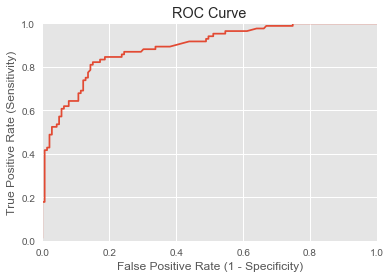

In [93]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [94]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [104]:
evaluate_threshold(0.32)

Sensitivity: 0.833333333333
Specificity: 0.827338129496


### Testing Without Other Features

In [96]:
# trainClasses = training.ix[:,14:]
# testClasses = test_meta.ix[:,14:]

In [97]:
# print(trainClasses.shape)
# print(train_meta_Class.shape)
# print(testClasses.shape)

In [98]:
# from sklearn.tree import DecisionTreeClassifier
# s = DecisionTreeClassifier()
# s.fit(trainClasses, train_meta_Class)
# target_pred_Class = s.predict(testClasses)

# test_meta["Survived"] = target_pred_Class

In [99]:
# print(round(accuracy(targ_test, target_pred_Class)*100, 2), "% Accuracy")

In [100]:
# testClasses["Predicted"] = target_pred_Class
# testClasses["Actual"] = targ_test

In [101]:
# testClasses.astype(int)

In [102]:
print(accuracy_score, "% Accuracy")

84.0336 % Accuracy
